In [1]:
import gzip
import brotli
import blosc

import timeit

import matplotlib.pyplot as plt
import numpy as np

font = {'size'   : 18}
import matplotlib
matplotlib.rc('font', **font)

In [2]:
# 16bit data from https://open-neurodata-test.s3.amazonaws.com/ZBrain/ZBrain/ZBB_y385-Cre/798_798_2000/0-512_0-512_64-80
# with open("0-512_0-512_64-80", "rb") as rawfile:

# 8bit data from https://open-neurodata-test.s3.amazonaws.com/collman/collman15v2/EM25K/2.24_2.24_70.0/512-1024_512-1024_0-16
with open("512-1024_512-1024_0-16", "rb") as rawfile:
    raw_data = rawfile.read()

In [3]:
def compress_test(raw_data, compress_func, **kwargs):
    comp_data_len = len(compress_func(raw_data, **kwargs))
    print(f"{compress_func.__module__} {kwargs}", comp_data_len)
    result = %timeit -n1 -r5 -o compress_func(raw_data, **kwargs)
    return result, comp_data_len

In [4]:
gz_size, gz_qq, gz_results, gz_decompress_results = [], [], [], []
for q in range(1, 10):
    result, comp_data_len = compress_test(raw_data, gzip.compress, compresslevel=q)
    gz_results.append(result)
    gz_qq.append(q)
    gz_size.append(comp_data_len)

    #decompress test
    comp_data = gzip.compress(raw_data, compresslevel=q)
    result, _ = compress_test(comp_data, gzip.decompress)
    gz_decompress_results.append(result)

gzip {'compresslevel': 1} 2793268
108 ms ± 6.25 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 4194304
37.7 ms ± 513 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 2} 2757709
116 ms ± 315 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 4194304
34.1 ms ± 334 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 3} 2743113
134 ms ± 716 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 4194304
33.7 ms ± 615 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 4} 2842763
178 ms ± 213 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 4194304
35.2 ms ± 238 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 5} 2839529
210 ms ± 715 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {} 4194304
35.5 ms ± 347 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
gzip {'compresslevel': 6} 2839510
210 ms ± 1.16 ms per loop (mean ± std. d

In [5]:
br_results, br_size, qq, brotli_decompress_results = [], [], [], []
for q in range(1, 9):
    result, comp_data_len = compress_test(raw_data, brotli.compress, quality=q)
    br_size.append(comp_data_len)
    br_results.append(result)
    qq.append(q)


    #decompress test
    comp_data = brotli.compress(raw_data, quality=q)
    result, _ = compress_test(comp_data, brotli.decompress)
    brotli_decompress_results.append(result)


brotli {'quality': 1} 3288113
17.7 ms ± 554 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 4194304
19.2 ms ± 92.4 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 2} 3101779
52.2 ms ± 414 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 4194304
20.9 ms ± 167 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 3} 3099708
61.4 ms ± 139 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 4194304
20.7 ms ± 141 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 4} 3228485
48.3 ms ± 185 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 4194304
18.8 ms ± 101 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 5} 2559026
369 ms ± 2.08 ms per loop (mean ± std. dev. of 5 runs, 1 loop each)
_brotli {} 4194304
30.9 ms ± 141 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
brotli {'quality': 6} 2540039
490 ms ± 2.85 ms per loop (mean ± std. dev. 

In [6]:
blosc_results, blosc_size, blosc_q, blosc_decompress_results = [], [], [], []
for q in range(3, 10):
    result, comp_data_len = compress_test(raw_data, blosc.compress, clevel=q)
    blosc_size.append(comp_data_len)
    blosc_results.append(result)
    blosc_q.append(q)

    #decompress test
    comp_data = blosc.compress(raw_data, clevel=q)
    result, _ = compress_test(comp_data, blosc.decompress)
    blosc_decompress_results.append(result)


blosc.toplevel {'clevel': 3} 4194320
3.24 ms ± 743 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 4194304
347 µs ± 9.51 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 4} 4194320
3.67 ms ± 384 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 4194304
484 µs ± 10.3 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 5} 4194320
4.55 ms ± 253 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 4194304
480 µs ± 11.6 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 6} 4194320
6.03 ms ± 985 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 4194304
577 µs ± 9.96 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {'clevel': 7} 4194320
6.42 ms ± 494 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc.toplevel {} 4194304
596 µs ± 12.2 µs per loop (mean ± std. dev. of 5 runs, 1 loop each)
blosc

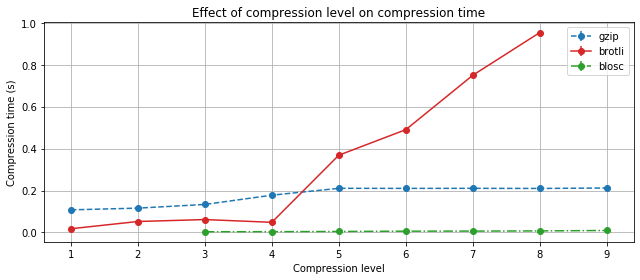

In [7]:
fig, ax1 = plt.subplots(figsize=(9, 4))

y = [sum(t.timings)/len(t.timings) for t in gz_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in gz_results]
h3 = ax1.errorbar(gz_qq, y, yerr, fmt='--o', color='tab:blue', label="gzip")

y = [sum(t.timings)/len(t.timings) for t in br_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in br_results]
h1 = ax1.errorbar(qq, y, yerr, fmt='-o', color='tab:red', label="brotli")

y = [sum(t.timings)/len(t.timings) for t in blosc_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in blosc_results]
h2 = ax1.errorbar(blosc_q, y, yerr, fmt='-.o', color='tab:green', label="blosc")

ax1.legend()
ax1.set_ylabel("Compression time (s)")
ax1.set_xlabel("Compression level")
ax1.set_title("Effect of compression level on compression time")

ax1.grid(True)
fig.tight_layout()
fig.savefig("compress.svg")

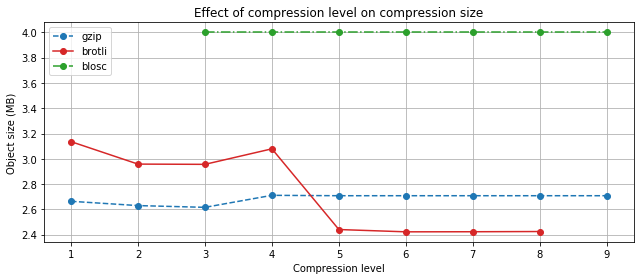

In [8]:
fig, ax2 = plt.subplots(figsize=(9, 4))
ax2.plot(gz_qq, [g/1024/1024 for g in gz_size], '--o', color='tab:blue', label="gzip")
ax2.plot(qq, [g/1024/1024 for g in br_size], '-o', color='tab:red', label="brotli")
ax2.plot(blosc_q, [g/1024/1024 for g in blosc_size], '-.o', color="tab:green", label="blosc")
ax2.legend()

ax2.set_ylabel("Object size (MB)")
ax2.set_xlabel("Compression level")
ax2.set_title("Effect of compression level on compression size")

ax2.grid(True)
fig.tight_layout()
fig.savefig("size.svg")

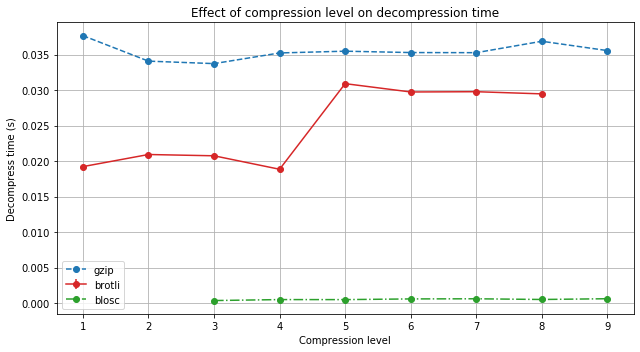

In [9]:
fig, ax1 = plt.subplots(figsize=(9, 5))

y = [sum(t.timings)/len(t.timings) for t in gz_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in gz_decompress_results]
h3 = ax1.errorbar(gz_qq, y, fmt='--o', color='tab:blue', label="gzip")

y = [sum(t.timings)/len(t.timings) for t in brotli_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in brotli_decompress_results]
h1 = ax1.errorbar(qq, y, yerr, fmt='-o', color='tab:red',label="brotli")

y = [sum(t.timings)/len(t.timings) for t in blosc_decompress_results]
yerr = [np.std(t.timings) / np.sqrt(len(t.timings)) for t in blosc_decompress_results]
h2 = ax1.errorbar(blosc_q, y, fmt='-.o', color='tab:green', label="blosc")


ax1.legend()
ax1.set_ylabel("Decompress time (s)")
ax1.set_xlabel("Compression level")
ax1.set_title("Effect of compression level on decompression time")

ax1.grid(True)
fig.tight_layout()
fig.savefig("decompress.svg")